ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

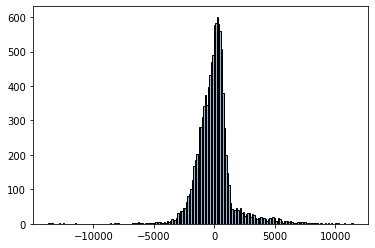

In [1]:
# 1. Visualizing residuals for multiple linear regression using the 'diamonds' dataset
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

df = sns.load_dataset('diamonds').dropna()
X = df[['carat', 'depth', 'table']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
residuals = y_test - model.predict(X_test)
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.show()

In [ ]:
# 2. Calculate MSE, MAE, and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, model.predict(X_test))
mae = mean_absolute_error(y_test, model.predict(X_test))
rmse = np.sqrt(mse)
print(f'MSE: {mse}, MAE: {mae}, RMSE: {rmse}')


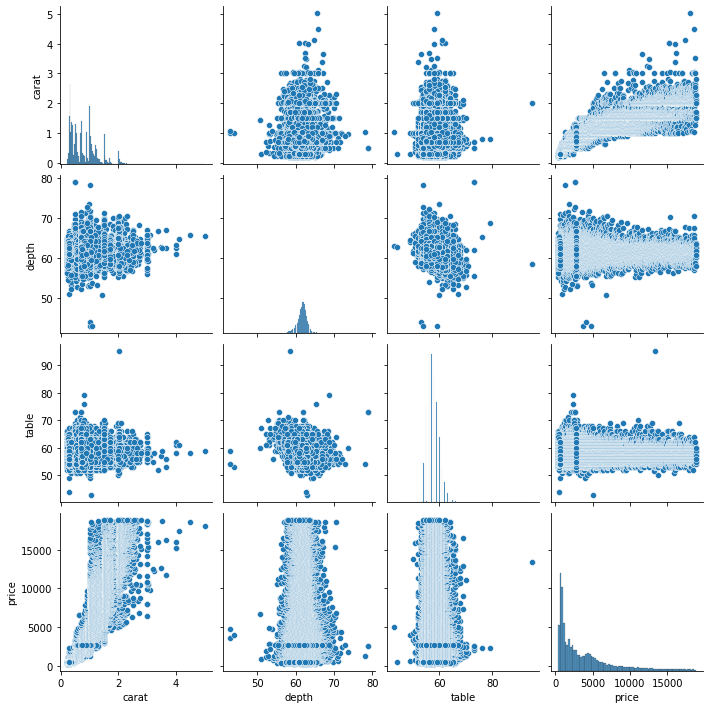

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- table


In [11]:
# 3. Checking linear regression assumptions
sns.pairplot(df[['carat', 'depth', 'table', 'price']])  # Linearity
plt.show()
sns.residplot(x=model.predict(X_test), y=residuals, lowess=True)
plt.title('Residuals vs Fitted Values')
plt.show()
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')  # Multicollinearity
plt.show()


In [2]:
# 4. Machine learning pipeline for regression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor())
])
scores = cross_val_score(pipeline, X, y, scoring='r2', cv=5)
print('Cross-validated R-squared:', np.mean(scores))


Cross-validated R-squared: -0.8383352640820586


In [3]:
# 5. Simple linear regression and coefficients
X_simple = df[['carat']]
model.fit(X_simple, y)
print(f'Intercept: {model.intercept_}, Coefficients: {model.coef_}, R-squared: {model.score(X_simple, y)}')


Intercept: -2256.3605800457576, Coefficients: [7756.42561797], R-squared: 0.8493305264354858


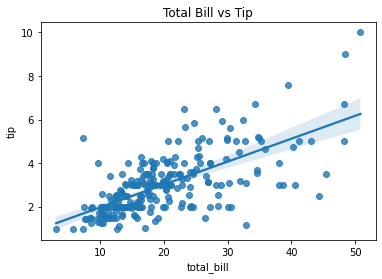

In [4]:
# 6. Relationship between total bill and tip in 'tips' dataset
tips = sns.load_dataset('tips')
X_tips = tips[['total_bill']]
y_tips = tips['tip']
model.fit(X_tips, y_tips)
sns.regplot(x='total_bill', y='tip', data=tips)
plt.title('Total Bill vs Tip')
plt.show()


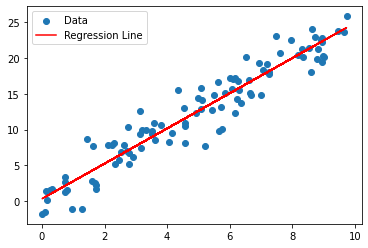

In [5]:
# 7. Linear regression on synthetic data
X_syn = np.random.rand(100, 1) * 10
y_syn = 2.5 * X_syn.squeeze() + np.random.randn(100) * 2
model.fit(X_syn, y_syn)
plt.scatter(X_syn, y_syn, label='Data')
plt.plot(X_syn, model.predict(X_syn), color='red', label='Regression Line')
plt.legend()
plt.show()


In [6]:
# 8. Pickling a model
import pickle
with open('linear_model.pkl', 'wb') as f:
    pickle.dump(model, f)


C:\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


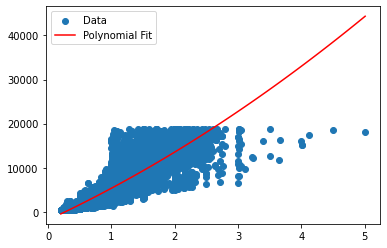

In [7]:
# 9. Polynomial regression (degree 2)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_simple)
model.fit(X_poly, y)
x_range = np.linspace(min(X_simple.values), max(X_simple.values), 100)
y_range = model.predict(poly.transform(x_range))
plt.scatter(X_simple, y, label='Data')
plt.plot(x_range, y_range, color='red', label='Polynomial Fit')
plt.legend()
plt.show()


In [8]:
# 10. Synthetic linear regression
y_syn = 3 * X_syn.squeeze() + 7 + np.random.randn(100) * 2
model.fit(X_syn, y_syn)
print(f'Coefficient: {model.coef_}, Intercept: {model.intercept_}')


Coefficient: [3.0053503], Intercept: 6.953921506400883


In [9]:
# 11. Polynomial regression comparison
for d in range(1, 5):
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X_syn)
    model.fit(X_poly, y_syn)
    print(f'Degree {d} R-squared: {model.score(X_poly, y_syn)}')


Degree 1 R-squared: 0.9569754515977911
Degree 2 R-squared: 0.9570189324705609
Degree 3 R-squared: 0.9573151423066683
Degree 4 R-squared: 0.957701388849125


In [10]:
# 12. Multiple linear regression with two features
X_multi = df[['carat', 'depth']]
model.fit(X_multi, y)
print(f'Coefficients: {model.coef_}, Intercept: {model.intercept_}, R-squared: {model.score(X_multi, y)}')


Coefficients: [7765.14066377 -102.16532216], Intercept: 4045.3331826012404, R-squared: 0.8506754571636563


C:\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: X has 1 features, but LinearRegression is expecting 2 features as input.

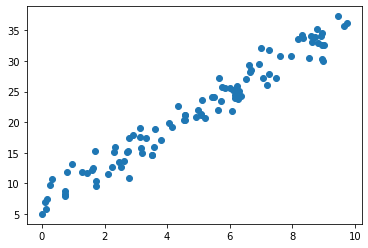

In [12]:
# 13. Linear regression visualization
plt.scatter(X_syn, y_syn)
plt.plot(X_syn, model.predict(X_syn), color='red')
plt.show()

In [13]:
# 14. Checking multicollinearity with VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print('VIF:', vif_data)


VIF: [3.9281087980045553, 389.40866319623035, 396.88905284188144]


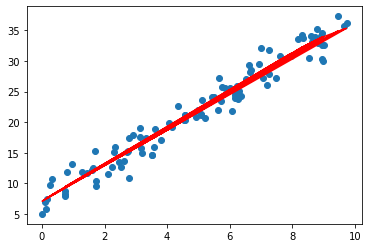

In [14]:
# 15. Polynomial regression (degree 4)
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_syn)
model.fit(X_poly, y_syn)
plt.scatter(X_syn, y_syn)
plt.plot(X_syn, model.predict(X_poly), color='red')
plt.show()


In [15]:
# 16. Machine learning pipeline with standardization
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LinearRegression())
])
pipeline.fit(X, y)
print('Pipeline R-squared:', pipeline.score(X, y))


Pipeline R-squared: 0.8536762884061408


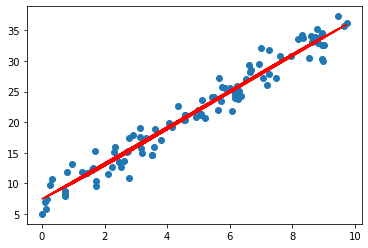

In [16]:
# 17. Polynomial regression (degree 3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X_syn)
model.fit(X_poly, y_syn)
plt.scatter(X_syn, y_syn)
plt.plot(X_syn, model.predict(X_poly), color='red')
plt.show()


In [17]:
# 18. Multiple regression with 5 features
X_five = np.random.rand(100, 5) * 10
y_five = X_five @ np.array([1.5, -2, 0.5, 3, 4]) + np.random.randn(100) * 2
model.fit(X_five, y_five)
print('R-squared:', model.score(X_five, y_five), 'Coefficients:', model.coef_)


R-squared: 0.9848479956907626 Coefficients: [ 1.62240851 -2.04640701  0.43742832  2.99060869  3.93821059]


ValueError: X has 1 features, but LinearRegression is expecting 5 features as input.

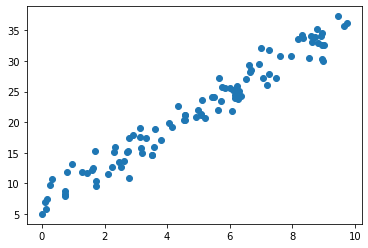

In [18]:
# 19. Linear regression visualization
plt.scatter(X_syn, y_syn)
plt.plot(X_syn, model.predict(X_syn), color='red')
plt.show()


In [19]:
# 20. Multiple linear regression with 3 features
X_three = np.random.rand(100, 3) * 10
y_three = X_three @ np.array([2, -1, 4]) + np.random.randn(100) * 2
model.fit(X_three, y_three)
print('R-squared:', model.score(X_three, y_three), 'Coefficients:', model.coef_)


R-squared: 0.9745636987023472 Coefficients: [ 1.99802153 -0.96082534  3.90032389]


In [20]:
# 21. Using joblib
from joblib import dump, load
dump(model, 'model.joblib')
loaded_model = load('model.joblib')


In [22]:
# 22. Linear regression with categorical features
import pandas as pd
tips_dummies = pd.get_dummies(tips, drop_first=True)
X_cat = tips_dummies.drop(columns=['tip'])
y_cat = tips_dummies['tip']
model.fit(X_cat, y_cat)
print('R-squared:', model.score(X_cat, y_cat))


R-squared: 0.47007812322060794


In [23]:
# 23. Ridge vs Linear regression
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_syn, y_syn)
print('Ridge Coefficients:', ridge.coef_)


Ridge Coefficients: [3.00138287]


In [24]:
# 24. Cross-validation
scores = cross_val_score(model, X_syn, y_syn, scoring='r2', cv=5)
print('Cross-validation scores:', scores)


Cross-validation scores: [0.94174779 0.9394926  0.95670664 0.98167941 0.94504504]


In [25]:
# 25. Comparing polynomial regression degrees
for d in range(1, 6):
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X_syn)
    model.fit(X_poly, y_syn)
    print(f'Degree {d} R-squared: {model.score(X_poly, y_syn)}')


Degree 1 R-squared: 0.9569754515977911
Degree 2 R-squared: 0.9570189324705609
Degree 3 R-squared: 0.9573151423066683
Degree 4 R-squared: 0.957701388849125
Degree 5 R-squared: 0.9582826698467203
